In [2]:
# Sonar Object Classification problem 
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
seed = 7
np.random.seed(seed)

In [5]:
import os
root = os.getcwd()

In [6]:
path = os.path.join(root,'Desktop','DS-PRACTICE-PYTHON')
path

'/Users/ram/Desktop/DS-PRACTICE-PYTHON'

In [10]:
sonar = pd.read_csv(os.path.join(path,'sonar.all-data.csv'),header=None)
# The dataset could be obtained from UCI Machine learning repository

In [11]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [12]:
sonar.shape

(208, 61)

In [62]:
# Get the list of categorical and numerical fields
# This is essential for Label encoding and creating dummy vars 
cat = list(sonar.select_dtypes(include=['object']).columns)
num = list(sonar.select_dtypes(exclude=['object']).columns)
cat

[60]

In [35]:
# Glimpse of the target var
sonar.iloc[:,60].head()

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [50]:
# Helps whether the data is balanced/unbalanced
sonar.groupby([60]).size()

60
M    111
R     97
dtype: int64

In [63]:
# Creating IV's and DV/TV
X = sonar.iloc[:,0:60]
Y = sonar.iloc[:,60]

In [69]:
# converting X and Y into numpy arrays
X = X.values
Y = Y.values

In [73]:
# encoding target variable
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
encoded_Y
# Here, "to_categorical" is not required as there are only two classes
# and also out final layer consists of only one neuron as its a binary classification

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [84]:
# Baseline Model
def create_model():
    model = Sequential()
    model.add(Dense(60,input_dim=60,activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #model.add(Dense(1)) for Regression problem
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [95]:
model = create_model()
history=model.fit(X,encoded_Y,epochs=100,batch_size=10,validation_split=0.33, verbose=0)

In [96]:
# list the details in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


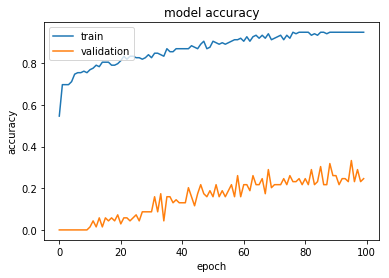

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

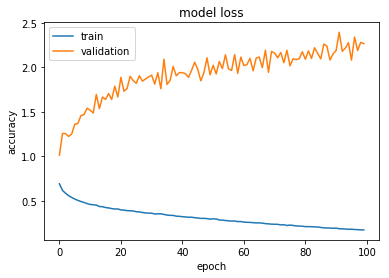

In [99]:
# Summarizing the loss function

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
# The above baseline models are just for demonstration purpose - clearly they are not performing well

In [93]:
# Model evaluation with scikit-learn wrapper classifier 
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
# For Regression
#model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=seed)
results = cross_val_score(model, X, encoded_Y, cv=kfold)
print('Baseline_accuracy: {}'.format(results.mean()*100))

Baseline_accuracy: 82.72943710222904


In [94]:
# evaluating model performance with standardized dataset
# instead of standardizing the entire dataset, it only standardizes the
# train set and uses the instance to transform the test set of the kfold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp',KerasClassifier(build_fn=create_model, epochs=100, 
                                         batch_size=10, verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True,random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print('Baseline_accuracy_standardized: {}'.format(results.mean()*100))

Baseline_accuracy_standardized: 84.61038937816372
